# Heart Disease Diagnostic Analysis

In [ ]:
#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')


In [ ]:
#Extracting CSV Dataset From System using Pandas Library
df=pd.read_csv('/content/Heart_disease_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#All Columns in the Dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#Checking Not null values
df.info()

# We can see that majority of the variables are of int64 type and are non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# There are 14 features in Dataset

**1.age: The person's age in year**

**2.sex: The person's sex (1 = male, 0 = female)**

**3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)**

**4.
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)**

**5.chol: The person's cholesterol measurement in mg/dl**

**6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)**

**7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)**

**8.thalach: The person's maximum heart rate achieved**

**9.exang: Exercise induced angina (1 = yes; 0 = no)**

**10.oldpeak: ST depression induced by exercise relative to rest**

**11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)**

**12.ca: The number of major vessels (0-3)**

**13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)**

**14.num: Heart disease (0 = no, 1 = yes)**

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Percentage of people having Heart Disease

In [ ]:
(df['target']==1).mean()*100

54.45544554455446

In [ ]:
num=df.groupby('target').size()
num

target
0    138
1    165
dtype: int64

In [ ]:
def heart_d(r):
    if r==0:
        return 'Absence'
    elif r==1:
        return 'Presence'

In [ ]:
#Applying converted data into our dataset with new column - Heart_Disease

df['Heart_Disease']=df['target'].apply(heart_d)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence


In [ ]:
hd=df.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     138
Presence    165
Name: target, dtype: int64

In [ ]:
#Converting Numerical Data into Categorical Data

def gen(r):
    if r==1:
        return 'Male'
    elif r==0:
        return 'Female'

In [ ]:
#Applying converted data into our dataset with new column - sex1

df['sex1']=df['sex'].apply(gen)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence,Female


In [ ]:
#Converting Numerical Data into Categorical Data

def age_rng(r):
    if r>=29 and r<40:
        return 'Young Age'
    elif r>=40 and r<55:
        return 'Middle Age'
    elif r>55:
        return 'Elder Age'

In [ ]:
#Applying converted data into our dataset with new column - Age_Range

df['Age_Range']=df['age'].apply(age_rng)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence,Male,Elder Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence,Male,Young Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence,Female,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence,Male,Elder Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence,Female,Elder Age


In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport

KeyError: ignored

In [ ]:
prof

NameError: ignored

# Data Transformation

In [ ]:
# We calculate the median and mode of ca and thal columns to be replaced in place of -100000.
# From below calculation, we come to know that median and mode for both 'ca' and 'thal' are 0.0 and 3.0
# So we will replace the -100000 with 0.0 in 'ca' and 3.0 in 'thal'


In [ ]:
df.median()

<ipython-input-31-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [ ]:
# replacing 0 in 'ca' where value = -100000

ca_median = int(df['ca'].median())
df.loc[df.ca == -100000, 'ca'] = np.nan
df.fillna(ca_median,inplace=True)

In [ ]:
df['ca']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
298    0.0
299    0.0
300    2.0
301    1.0
302    1.0
Name: ca, Length: 303, dtype: float64

In [ ]:
# Replacing 3 in 'thal' where value = -100000

thal_median = int(df['thal'].median())
df.loc[df.thal == -100000, 'thal'] = np.nan
df.fillna(thal_median,inplace=True)

In [ ]:
df['thal']

0      1.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
298    3.0
299    3.0
300    3.0
301    3.0
302    2.0
Name: thal, Length: 303, dtype: float64

In [ ]:
#Checking Data Types
df.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca               float64
thal             float64
target             int64
Heart_Disease     object
sex1              object
Age_Range         object
dtype: object

In [ ]:
# Converting the numeric columns to categorical 



In [ ]:
df = df.astype({"sex":'category', 
                                "cp":'category',
                                "fbs":'category',
                                "restecg":'category', 
                                "exang":'category',
                                "slope":'category',
                                "ca":'category', 
                                "thal":'category',
                                "target":'category'})

In [ ]:
df.dtypes

age                 int64
sex              category
cp               category
trestbps            int64
chol                int64
fbs              category
restecg          category
thalach             int64
exang            category
oldpeak           float64
slope            category
ca               category
thal             category
target           category
Heart_Disease      object
sex1               object
Age_Range          object
dtype: object

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1,Presence,Male,Elder Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1,Presence,Male,Young Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1,Presence,Female,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1,Presence,Male,Elder Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1,Presence,Female,Elder Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0,Absence,Female,Elder Age
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0,Absence,Male,Middle Age
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0,Absence,Male,Elder Age
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0,Absence,Male,Elder Age


In [ ]:
df.dtypes[df.dtypes=='category']

sex        category
cp         category
fbs        category
restecg    category
exang      category
slope      category
ca         category
thal       category
target     category
dtype: object

In [ ]:
df.describe()  
# After changing datatypes, only numeric values are reflected in summary because describe function summarizes only numeric data

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
# Boxplot before outlier treatment for proper visualization of the outliers and how far are they from mean 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2ac1635430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2ac16359d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2ac1635160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ac1635f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ac15c3280>],
 'means': []}

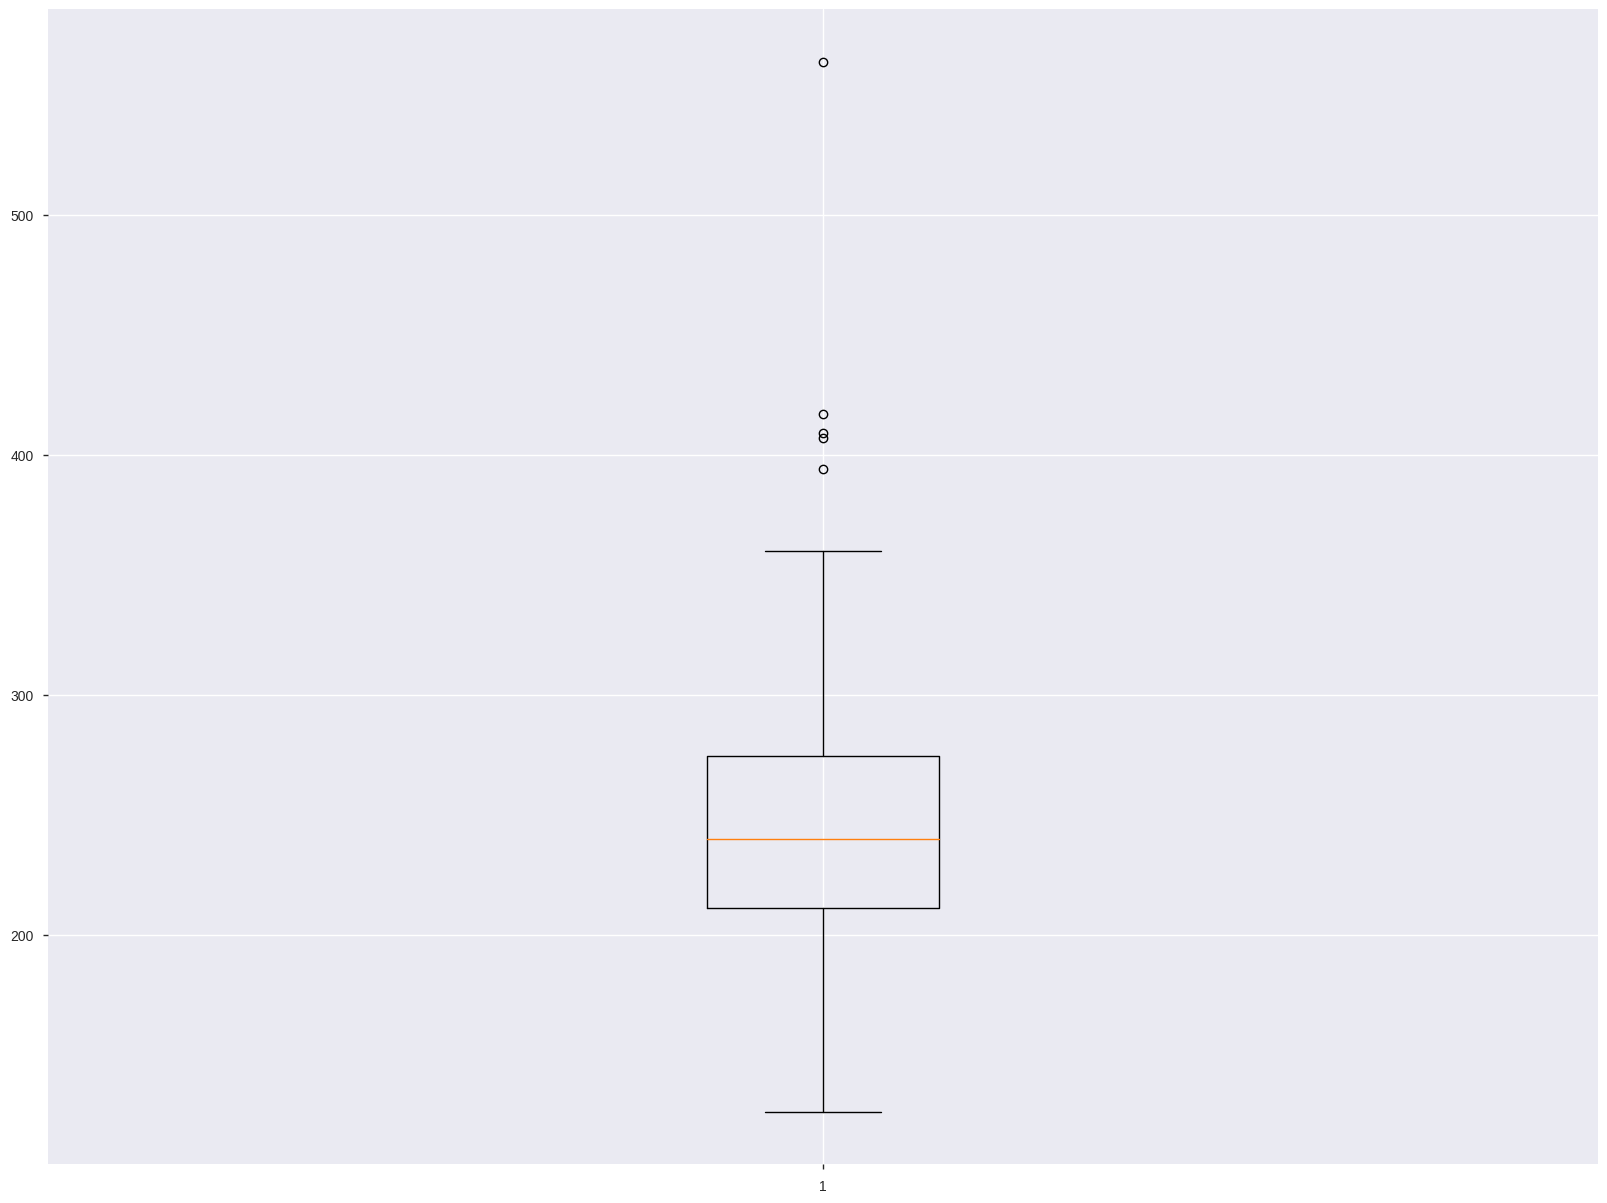

In [ ]:
plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [ ]:
df['chol'].mean()

246.26402640264027

In [ ]:
#Detecting Outliers using Inter Quartile Range
#Finding The data located in First Quartile and Third Quartile
#If the data point significantly differs from other cluster of data points then removing the data point

In [ ]:
outliers_chol = []
def Find_Outliers(data):
    data = sorted(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
 
    IQR = Q3-Q1
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
   
    for j in data: 
        if (j < l_bound or j > u_bound):
            outliers_chol.append(j)
    return outliers_chol

outliers_chol = Find_Outliers(df['chol'])
print("Outliers from IQR method for chol column: ", outliers_chol)

Outliers from IQR method for chol column:  [394, 407, 409, 417, 564]


In [ ]:
#Replacing the outliers in the chol column with the mean

In [ ]:
for i in outliers_chol:
    df['chol'] = np.where(df['chol'] == i, df['chol'].mean(), df['chol'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0.0,1.0,1,Presence,Male,Elder Age
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0.0,2.0,1,Presence,Male,Young Age
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0.0,2.0,1,Presence,Female,Middle Age
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0.0,2.0,1,Presence,Male,Elder Age
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0.0,2.0,1,Presence,Female,Elder Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.2,1,0.0,3.0,0,Absence,Female,Elder Age
299,45,1,3,110,264.0,0,1,132,0,1.2,1,0.0,3.0,0,Absence,Male,Middle Age
300,68,1,0,144,193.0,1,1,141,0,3.4,1,2.0,3.0,0,Absence,Male,Elder Age
301,57,1,0,130,131.0,0,1,115,1,1.2,1,1.0,3.0,0,Absence,Male,Elder Age


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2ac1450a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2ac1450fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2ac1450760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ac145c5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ac145c880>],
 'means': []}

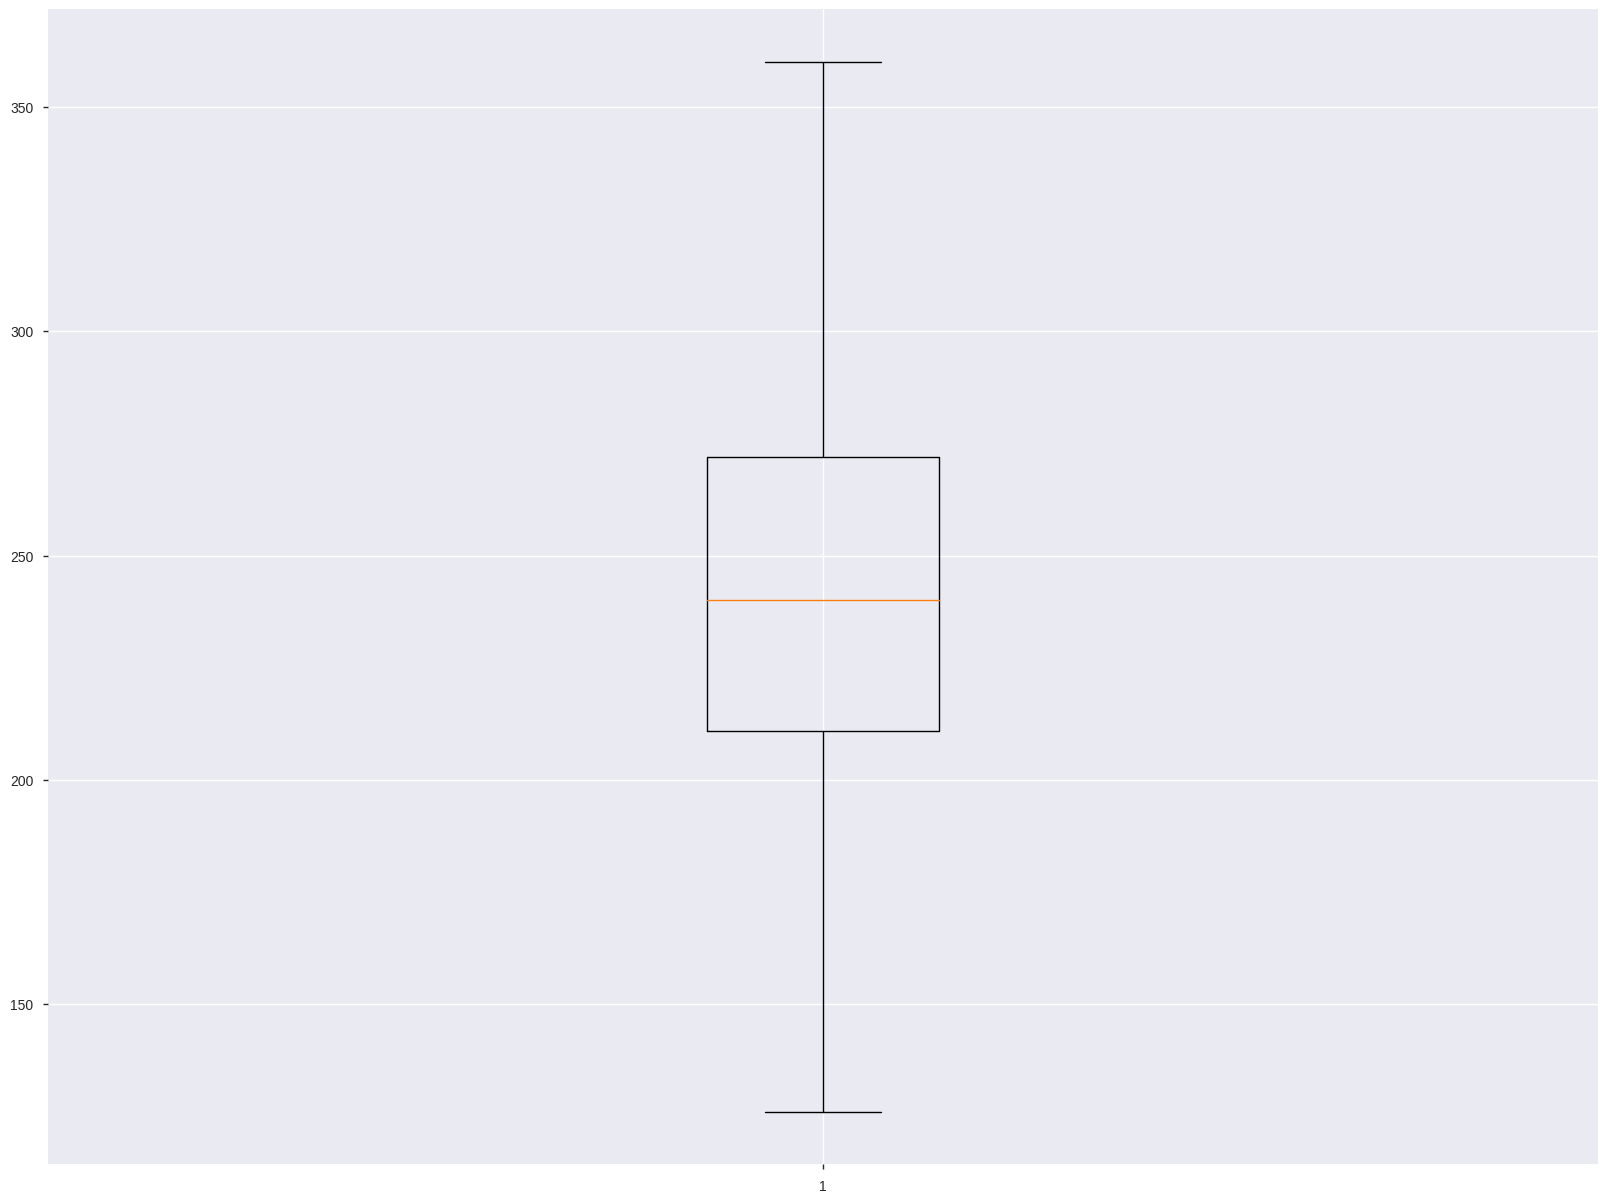

In [ ]:
# Boxplot after removing outlier 

plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [ ]:
# Replacing zeros with mean in 'oldpeak' column

In [ ]:
df['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [ ]:
df['oldpeak'] = np.where(df['oldpeak'] == 0, df['oldpeak'].mean(), df['oldpeak'])

In [ ]:
# Checking the oldpeak column after replacing zeros with mean

In [ ]:
df['oldpeak']

0      2.300000
1      3.500000
2      1.400000
3      0.800000
4      0.600000
         ...   
298    0.200000
299    1.200000
300    3.400000
301    1.200000
302    1.039604
Name: oldpeak, Length: 303, dtype: float64

In [ ]:
#checking if there are any remaining null values

In [ ]:
df['oldpeak'].isna().count()

# now we can see there are no zero value in oldpeak column

303

In [ ]:
# If we observe the oldpeak distribution it is skewed
# So we perform Log transformation to remove skewness from 'oldpeak' column

In [ ]:
oldpeak_log = np.log(df['oldpeak'])
oldpeak_log

0      0.832909
1      1.252763
2      0.336472
3     -0.223144
4     -0.510826
         ...   
298   -1.609438
299    0.182322
300    1.223775
301    0.182322
302    0.038840
Name: oldpeak, Length: 303, dtype: float64

# Viewing the cleaned data set

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233.0,1,0,150,0,2.300000,0,0.0,1.0,1,Presence,Male,Elder Age
1,37,1,2,130,250.0,0,1,187,0,3.500000,0,0.0,2.0,1,Presence,Male,Young Age
2,41,0,1,130,204.0,0,0,172,0,1.400000,2,0.0,2.0,1,Presence,Female,Middle Age
3,56,1,1,120,236.0,0,1,178,0,0.800000,2,0.0,2.0,1,Presence,Male,Elder Age
4,57,0,0,120,354.0,0,1,163,1,0.600000,2,0.0,2.0,1,Presence,Female,Elder Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.200000,1,0.0,3.0,0,Absence,Female,Elder Age
299,45,1,3,110,264.0,0,1,132,0,1.200000,1,0.0,3.0,0,Absence,Male,Middle Age
300,68,1,0,144,193.0,1,1,141,0,3.400000,1,2.0,3.0,0,Absence,Male,Elder Age
301,57,1,0,130,131.0,0,1,115,1,1.200000,1,1.0,3.0,0,Absence,Male,Elder Age


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            303 non-null    int64   
 1   sex            303 non-null    category
 2   cp             303 non-null    category
 3   trestbps       303 non-null    int64   
 4   chol           303 non-null    float64 
 5   fbs            303 non-null    category
 6   restecg        303 non-null    category
 7   thalach        303 non-null    int64   
 8   exang          303 non-null    category
 9   oldpeak        303 non-null    float64 
 10  slope          303 non-null    category
 11  ca             303 non-null    category
 12  thal           303 non-null    category
 13  target         303 non-null    category
 14  Heart_Disease  303 non-null    object  
 15  sex1           303 non-null    object  
 16  Age_Range      303 non-null    object  
dtypes: category(9), float64(2), int64(3

In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,243.079617,149.646865,1.379277
std,9.082101,17.538143,44.720792,22.905161,0.937039
min,29.000000,94.000000,126.000000,71.000000,0.100000
25%,47.500000,120.000000,211.000000,133.500000,1.000000
50%,55.000000,130.000000,240.000000,153.000000,1.039604
75%,61.000000,140.000000,272.000000,166.000000,1.600000
max,77.000000,200.000000,360.000000,202.000000,6.200000


In [ ]:
for x in df.dtypes[df.dtypes=='category'].index:
    print(x+":")
    print(pd.Categorical(df[x]))
    print()

sex:
[1, 1, 0, 1, 0, ..., 0, 1, 1, 1, 0]
Length: 303
Categories (2, int64): [0, 1]

cp:
[3, 2, 1, 1, 0, ..., 0, 3, 0, 0, 1]
Length: 303
Categories (4, int64): [0, 1, 2, 3]

fbs:
[1, 0, 0, 0, 0, ..., 0, 0, 1, 0, 0]
Length: 303
Categories (2, int64): [0, 1]

restecg:
[0, 1, 0, 1, 1, ..., 1, 1, 1, 1, 0]
Length: 303
Categories (3, int64): [0, 1, 2]

exang:
[0, 0, 0, 0, 1, ..., 1, 0, 0, 1, 0]
Length: 303
Categories (2, int64): [0, 1]

slope:
[0, 0, 2, 2, 2, ..., 1, 1, 1, 1, 1]
Length: 303
Categories (3, int64): [0, 1, 2]

ca:
[0.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 2.0, 1.0, 1.0]
Length: 303
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

thal:
[1.0, 2.0, 2.0, 2.0, 2.0, ..., 3.0, 3.0, 3.0, 3.0, 2.0]
Length: 303
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

target:
[1, 1, 1, 1, 1, ..., 0, 0, 0, 0, 0]
Length: 303
Categories (2, int64): [0, 1]



/usr/local/lib/python3.9/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [ ]:
# Summary for categorical variables
df[df.dtypes[df.dtypes=='category'].index].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303.0,303.0,303
unique,2,4,2,3,2,3,5.0,4.0,2
top,1,0,0,1,0,2,0.0,2.0,1
freq,207,143,258,152,204,142,175.0,166.0,165


In [ ]:
df.dtypes

age                 int64
sex              category
cp               category
trestbps            int64
chol              float64
fbs              category
restecg          category
thalach             int64
exang            category
oldpeak           float64
slope            category
ca               category
thal             category
target           category
Heart_Disease      object
sex1               object
Age_Range          object
dtype: object

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233.0,1,0,150,0,2.300000,0,0.0,1.0,1,Presence,Male,Elder Age
1,37,1,2,130,250.0,0,1,187,0,3.500000,0,0.0,2.0,1,Presence,Male,Young Age
2,41,0,1,130,204.0,0,0,172,0,1.400000,2,0.0,2.0,1,Presence,Female,Middle Age
3,56,1,1,120,236.0,0,1,178,0,0.800000,2,0.0,2.0,1,Presence,Male,Elder Age
4,57,0,0,120,354.0,0,1,163,1,0.600000,2,0.0,2.0,1,Presence,Female,Elder Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.200000,1,0.0,3.0,0,Absence,Female,Elder Age
299,45,1,3,110,264.0,0,1,132,0,1.200000,1,0.0,3.0,0,Absence,Male,Middle Age
300,68,1,0,144,193.0,1,1,141,0,3.400000,1,2.0,3.0,0,Absence,Male,Elder Age
301,57,1,0,130,131.0,0,1,115,1,1.200000,1,1.0,3.0,0,Absence,Male,Elder Age


In [ ]:
df.describe()  
# After changing datatypes, only numeric values are reflected in summary because describe function summarizes only numeric data

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,243.079617,149.646865,1.379277
std,9.082101,17.538143,44.720792,22.905161,0.937039
min,29.000000,94.000000,126.000000,71.000000,0.100000
25%,47.500000,120.000000,211.000000,133.500000,1.000000
50%,55.000000,130.000000,240.000000,153.000000,1.039604
75%,61.000000,140.000000,272.000000,166.000000,1.600000
max,77.000000,200.000000,360.000000,202.000000,6.200000


In [ ]:
# Boxplot before outlier treatment for proper visualization of the outliers and how far are they from mean 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2ac13eed00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2ac13fd2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2ac13eea30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ac13fd880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ac13fdb50>],
 'means': []}

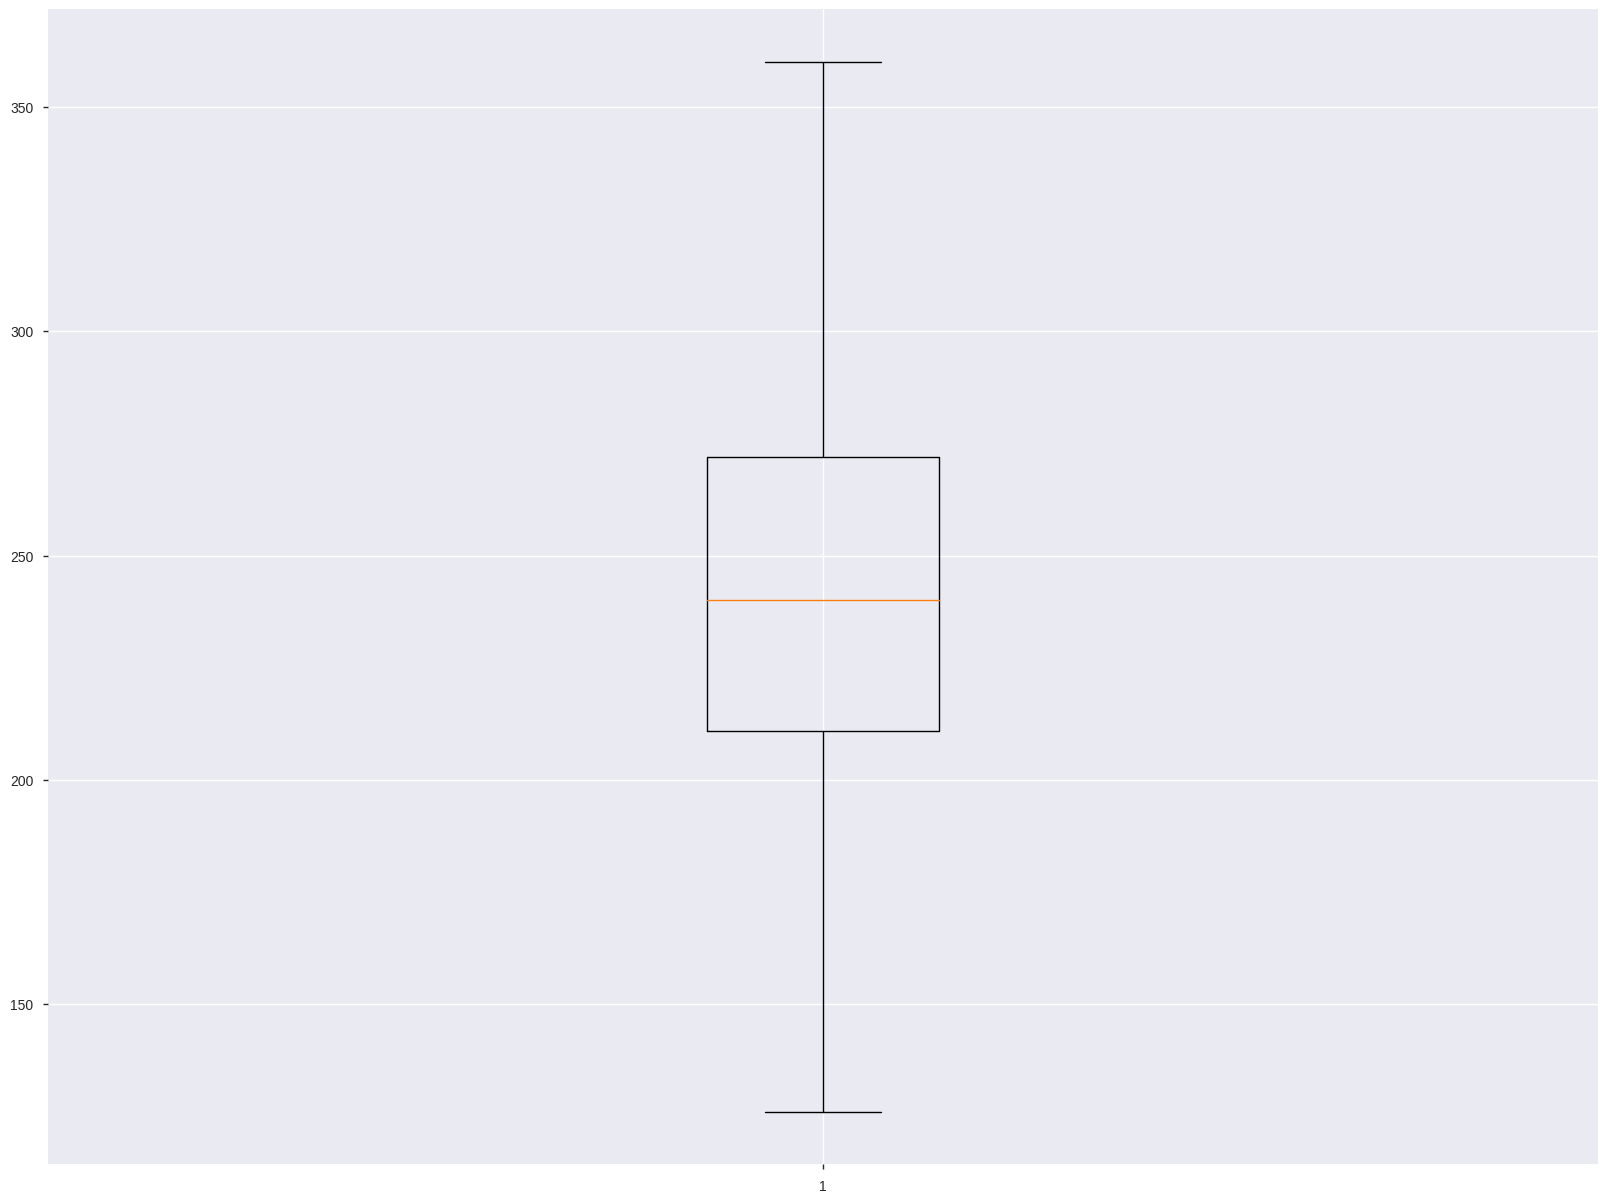

In [ ]:
plt.subplots(figsize=(20,15))
plt.boxplot(data=df, x='chol')

In [ ]:
df['chol'].mean()

243.0796172279271

In [ ]:
#Detecting Outliers using Inter Quartile Range
#Finding The data located in First Quartile and Third Quartile
#If the data point significantly differs from other cluster of data points then removing the data point


In [ ]:
outliers_chol = []
def Find_Outliers(data):
    data = sorted(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
 
    IQR = Q3-Q1
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
   
    for j in data: 
        if (j < l_bound or j > u_bound):
            outliers_chol.append(j)
    return outliers_chol

outliers_chol = Find_Outliers(df['chol'])
print("Outliers from IQR method for chol column: ", outliers_chol)

Outliers from IQR method for chol column:  []
